In [ ]:
1.Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.


In [1]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('youtubers_df.csv')

# Display the first few rows of the dataset
print(df.head())

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [3]:
# Print a header indicating the following output will show the data types of each column
print("Data types:")

# Print the data types of each column in the DataFrame
print(df.dtypes)

Data types:
Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object


In [5]:
# Print the count of missing values for each column in the DataFrame
print("Missing values:")
print(df.isnull().sum())

Missing values:
Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [ ]:
Trend Analysis:
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [13]:
# Group the DataFrame by 'Categories' and sum the 'Suscribers' for each category
category_subscribers = df.groupby('Categories')['Suscribers'].sum()

# Sort the categories by the total number of subscribers in descending order and select the top 10
top_10_categories = category_subscribers.sort_values(ascending=False).head(10)
# Define a function to format large numbers into a more readable format
def format_number(x):
    if x >= 1e9:
        return f"{x / 1e9:.2f}B"
    elif x >= 1e6:
        return f"{x / 1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Apply the formatting function to the top 10 categories
top_10_categories_formatted = top_10_categories.apply(format_number)

print("Top 10 categories with the most subscribers:")
print(top_10_categories_formatted)





Top 10 categories with the most subscribers:
Categories
Música y baile                 4.29B
Películas, Animación           1.38B
Animación, Juguetes          851.90M
Música y baile, Películas    798.50M
Noticias y Política          676.10M
Animación, Videojuegos       659.40M
Vlogs diarios                654.90M
Películas, Humor             622.10M
Educación                    600.30M
Animación, Humor             561.20M
Name: Suscribers, dtype: object


In [7]:
# Select the top 10 rows with the highest number of subscribers
top_10_subscribers = df.nlargest(10, 'Suscribers')

# Group the top 10 rows by 'Categories' and count the occurrences of each category
category_counts = top_10_subscribers['Categories'].value_counts()

# Identify the category with the maximum count
most_common_category = category_counts.idxmax()
most_common_count = category_counts.max()

print(f"The category with the most top ten subscribers is: {most_common_category}")
print(f"Number of times it appears in the top ten: {most_common_count}")


The category with the most top ten subscribers is: Música y baile
Number of times it appears in the top ten: 2


C:\Users\malot\AppData\Local\Temp\ipykernel_4184\3649972462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')


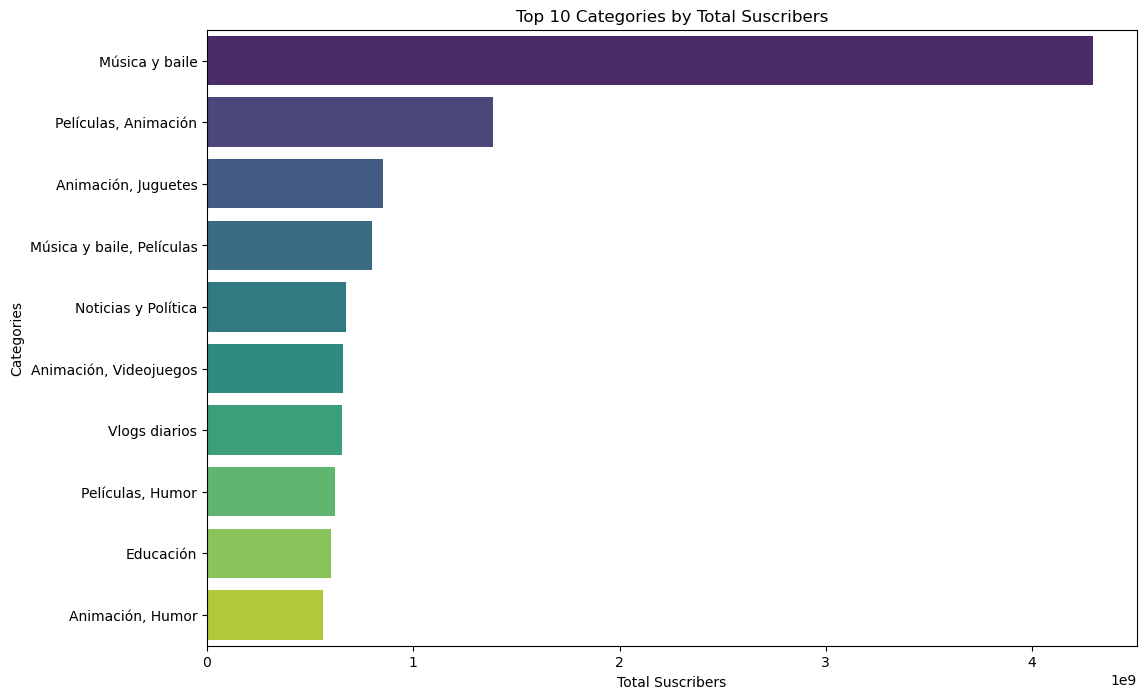

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 categories by total suscribers with a colorful palette
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 Categories by Total Suscribers')
plt.xlabel('Total Suscribers')
plt.ylabel('Categories')
plt.show()


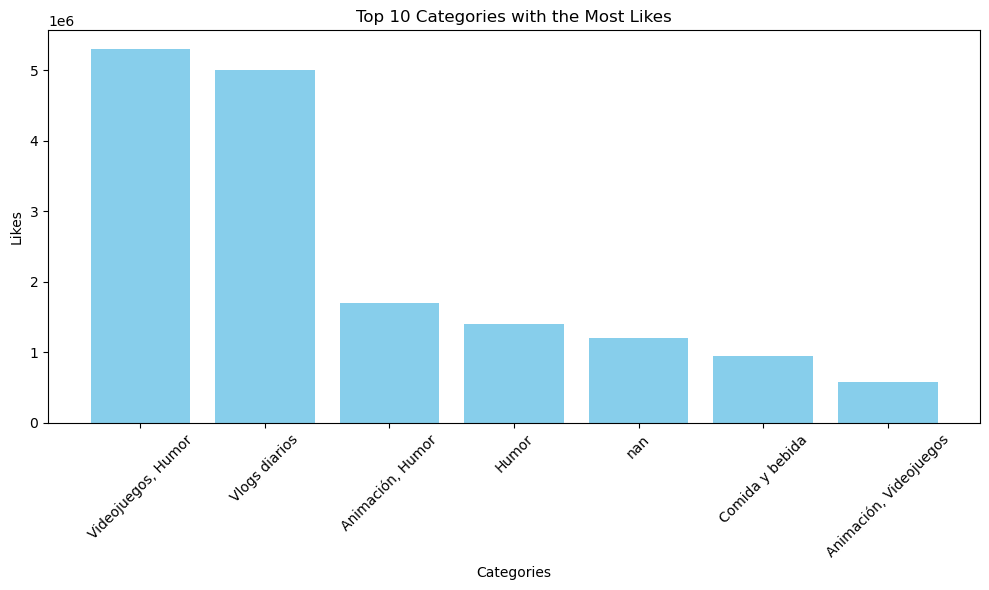

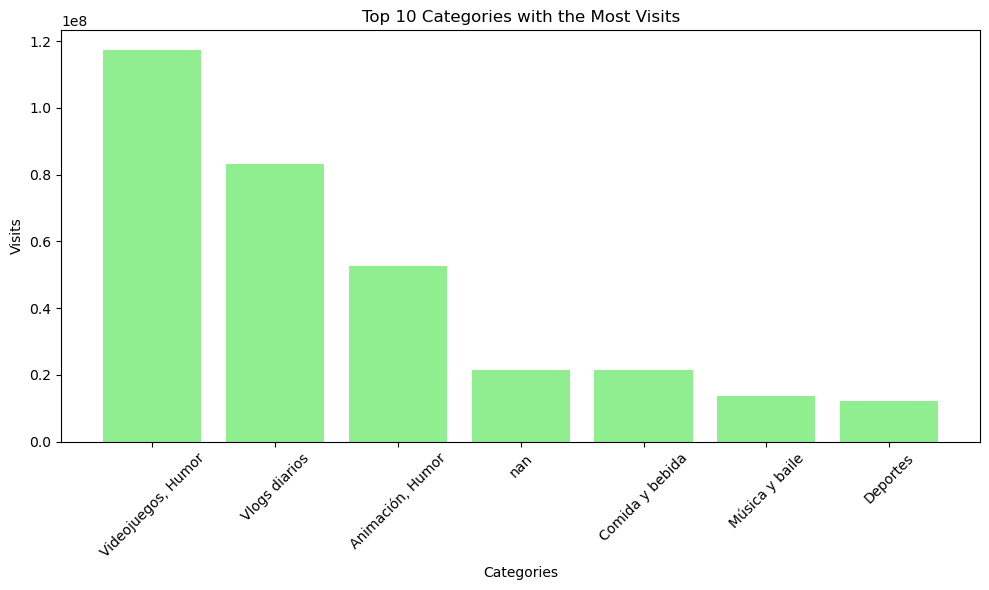

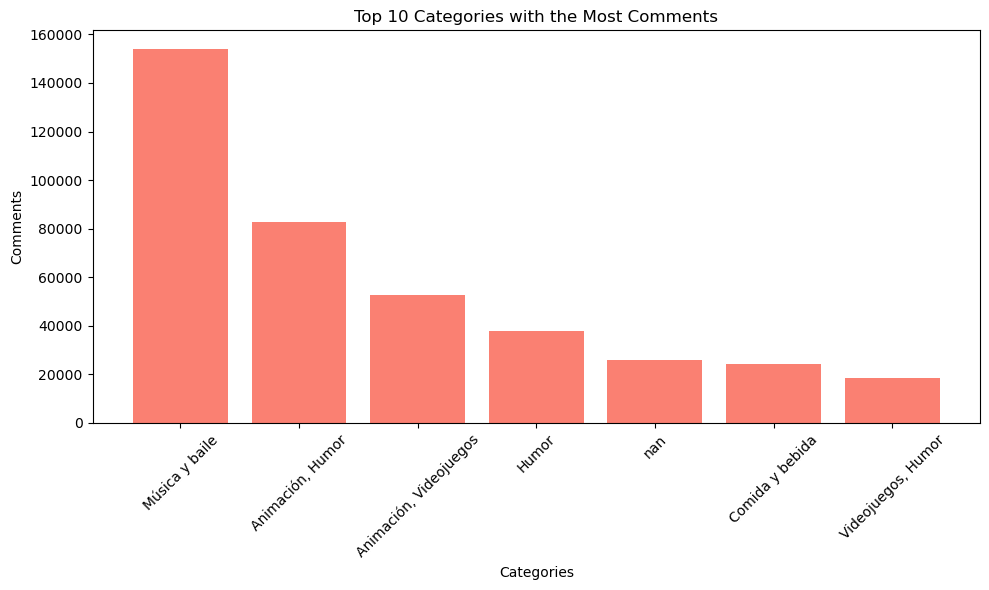

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('youtubers_df.csv')

# Ensure the 'Categories' column is of type string and handle missing values
data['Categories'] = data['Categories'].astype(str).fillna('Unknown')

# Identify the top 10 categories with the most likes
top_10_likes_categories = data.nlargest(10, 'Likes')[['Categories', 'Likes']]

# Identify the top 10 categories with the most visits
top_10_visits_categories = data.nlargest(10, 'Visits')[['Categories', 'Visits']]

# Identify the top 10 categories with the most comments
top_10_comments_categories = data.nlargest(10, 'Comments')[['Categories', 'Comments']]

# Plotting the top 10 categories with the most likes
plt.figure(figsize=(10, 6))
plt.bar(top_10_likes_categories['Categories'], top_10_likes_categories['Likes'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Likes')
plt.title('Top 10 Categories with the Most Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 10 categories with the most visits
plt.figure(figsize=(10, 6))
plt.bar(top_10_visits_categories['Categories'], top_10_visits_categories['Visits'], color='lightgreen')
plt.xlabel('Categories')
plt.ylabel('Visits')
plt.title('Top 10 Categories with the Most Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 10 categories with the most comments
plt.figure(figsize=(10, 6))
plt.bar(top_10_comments_categories['Categories'], top_10_comments_categories['Comments'], color='salmon')
plt.xlabel('Categories')
plt.ylabel('Comments')
plt.title('Top 10 Categories with the Most Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
3.Audience Study:
- Analyze the distribution of streamers
audiences by country. Are there regional preferences for
specific content categories?

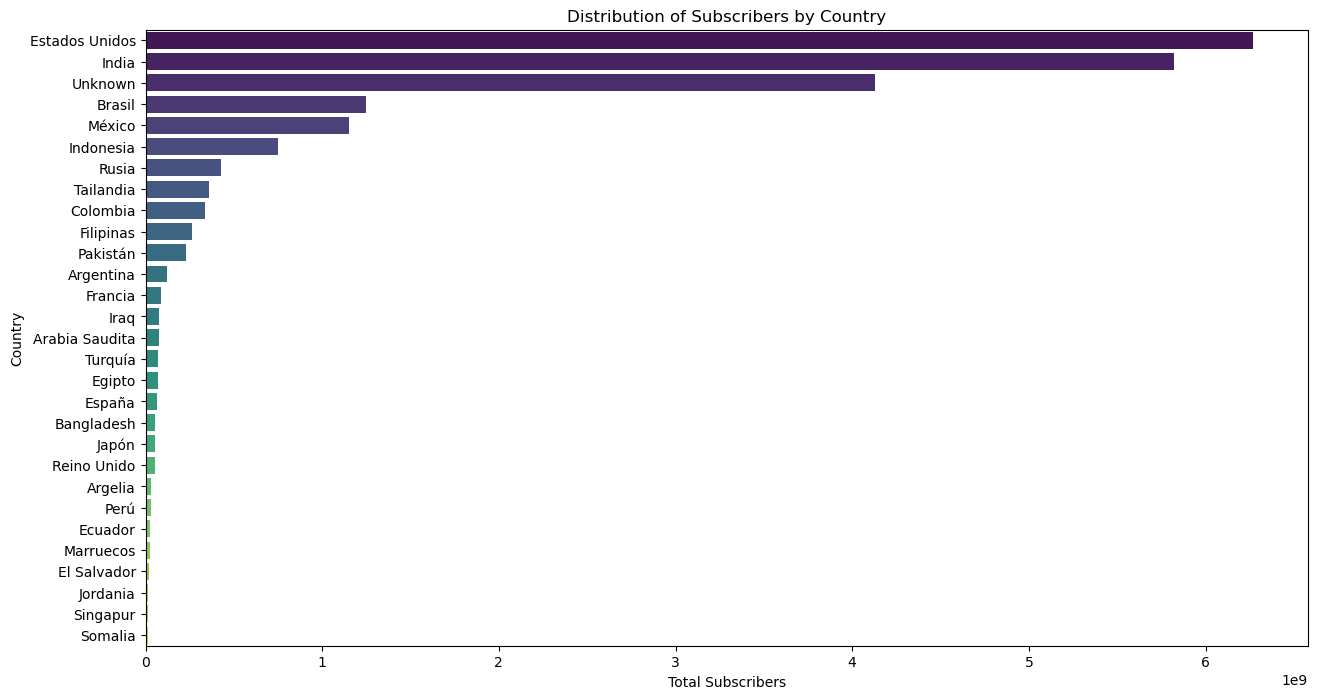

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a DataFrame
df = pd.read_csv('youtubers_df.csv')

# Group by 'Country' and sum the 'Suscribers' for each country
country_subscribers = df.groupby('Country')['Suscribers'].sum().sort_values(ascending=False)

# Create a DataFrame from the Series to use for plotting with hue
country_subscribers_df = country_subscribers.reset_index()

# Plot the distribution of subscribers by country
plt.figure(figsize=(15, 8))
sns.barplot(x=country_subscribers_df['Suscribers'], y=country_subscribers_df['Country'], palette='viridis', hue=country_subscribers_df['Country'], dodge=False, legend=False)
plt.title('Distribution of Subscribers by Country')
plt.xlabel('Total Subscribers')
plt.ylabel('Country')
plt.show()


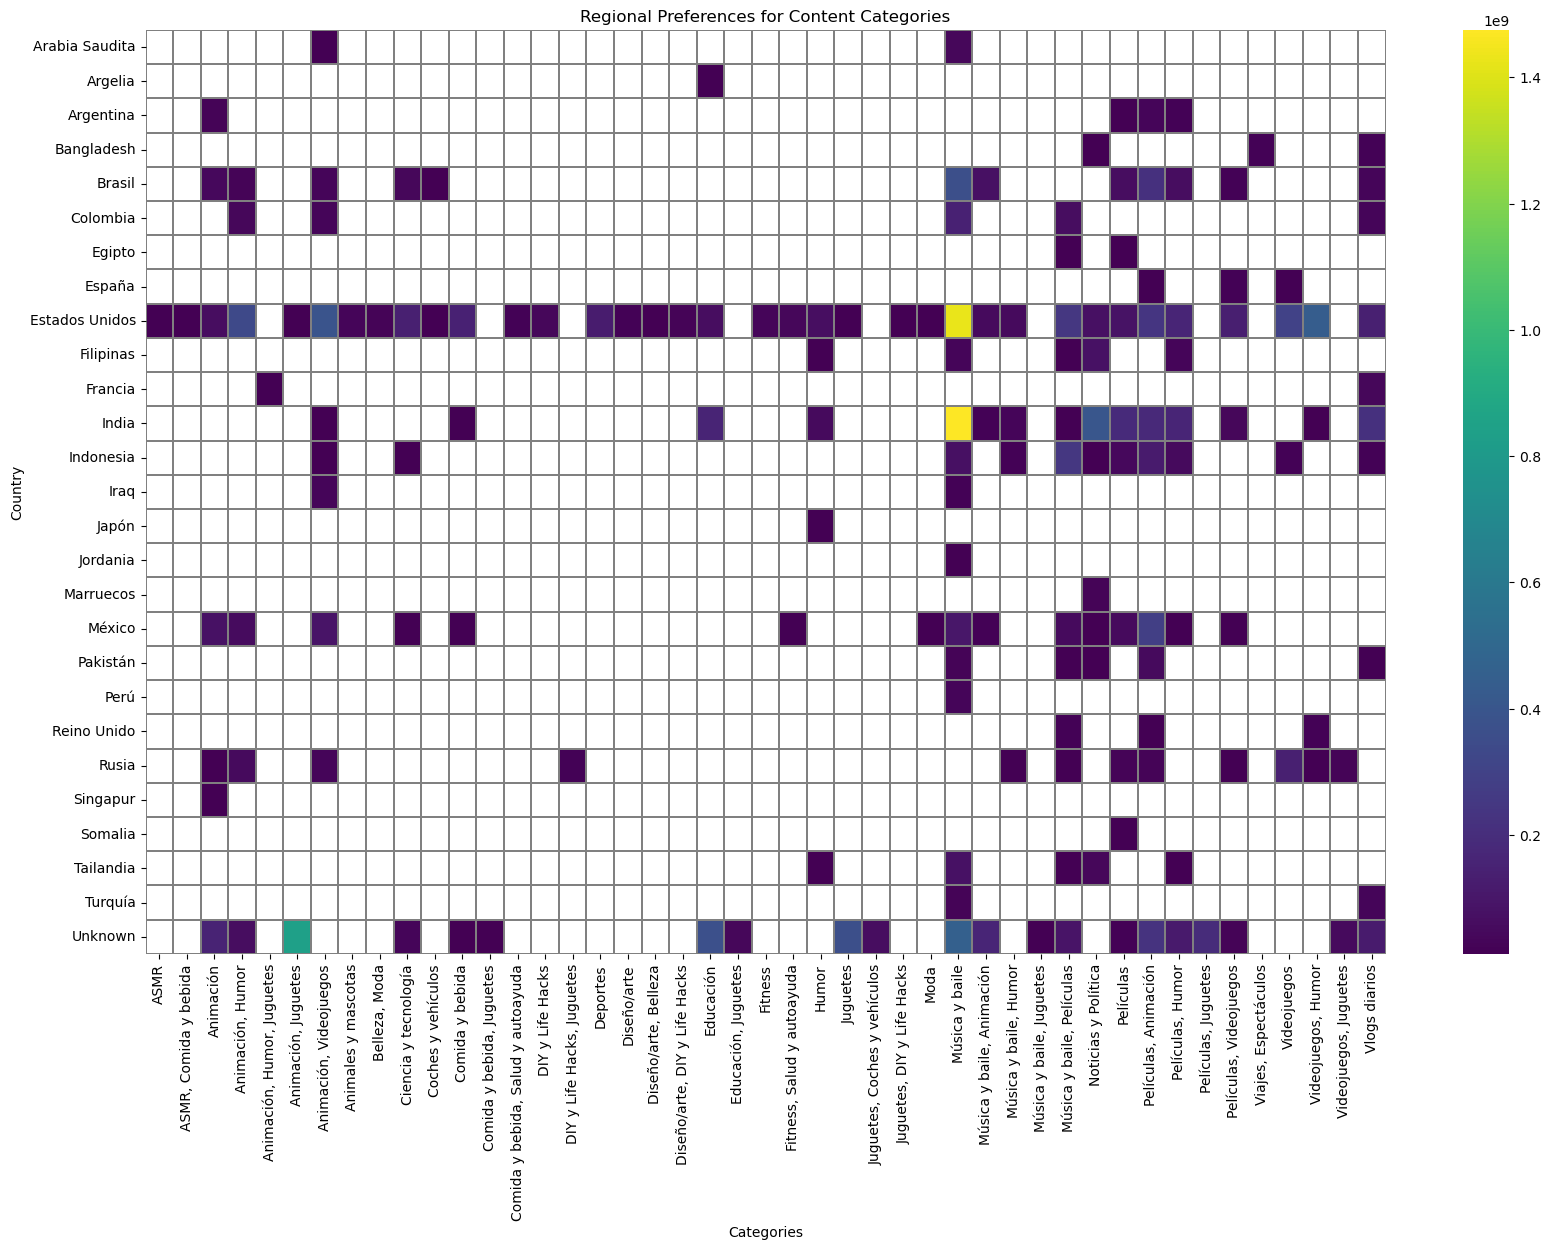

In [39]:
# Group by 'Country' and 'Categories' and sum the 'Suscribers' for each combination
country_category_subscribers = df.groupby(['Country', 'Categories'])['Suscribers'].sum().reset_index()

# Create a pivot table for easier visualization
pivot_table = country_category_subscribers.pivot(index='Country', columns='Categories', values='Suscribers')

# Plot the heatmap to visualize regional preferences for content categories
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.1, linecolor='gray')
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Categories')
plt.ylabel('Country')
plt.show()


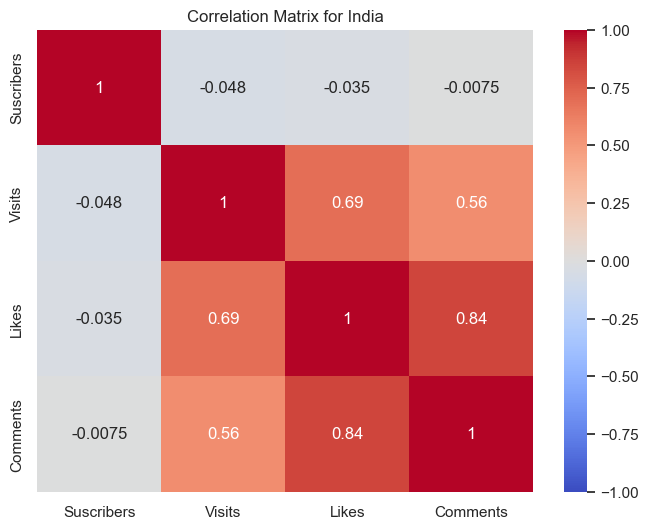

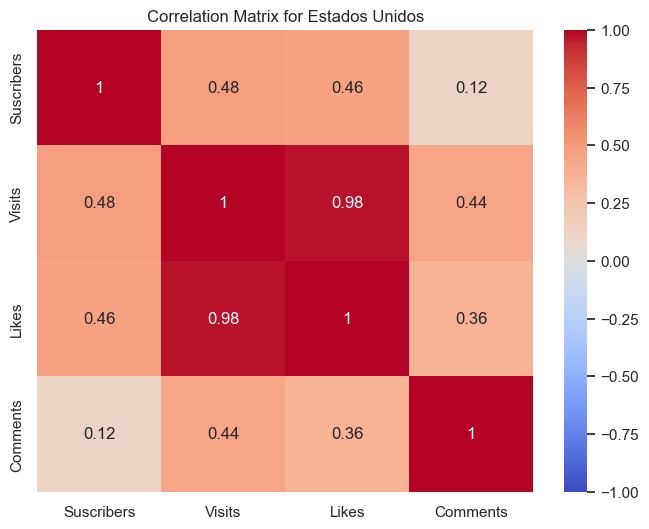

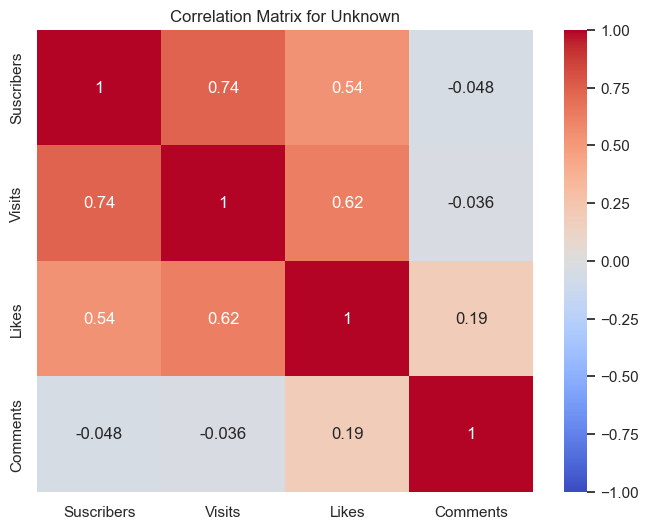

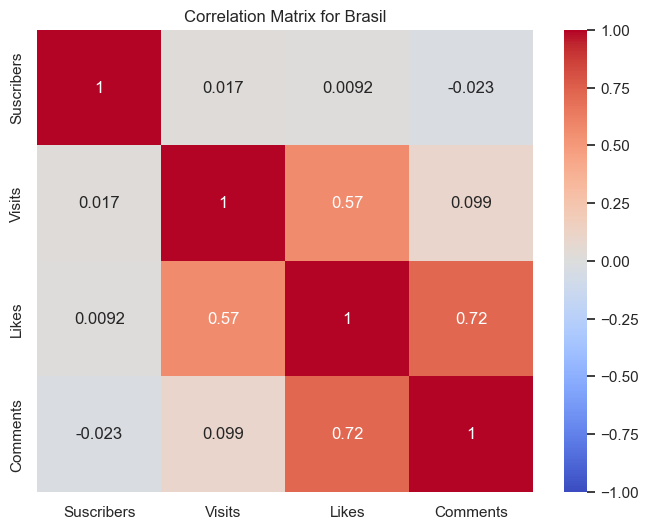

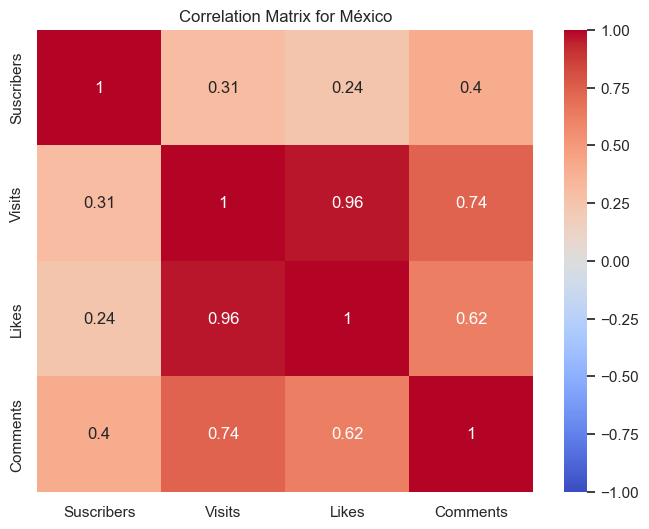

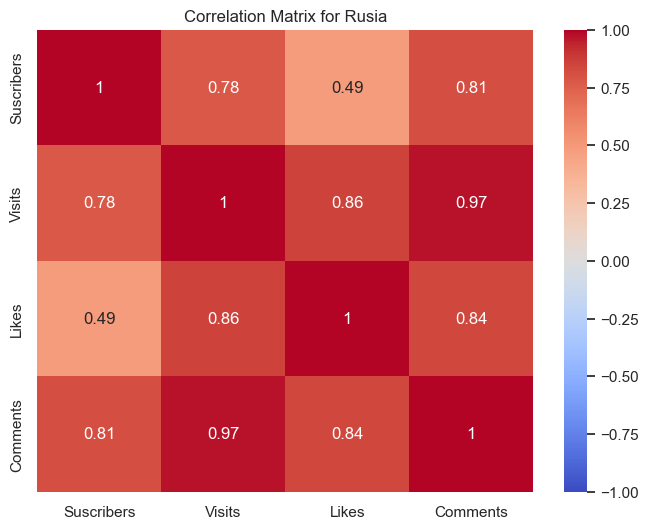

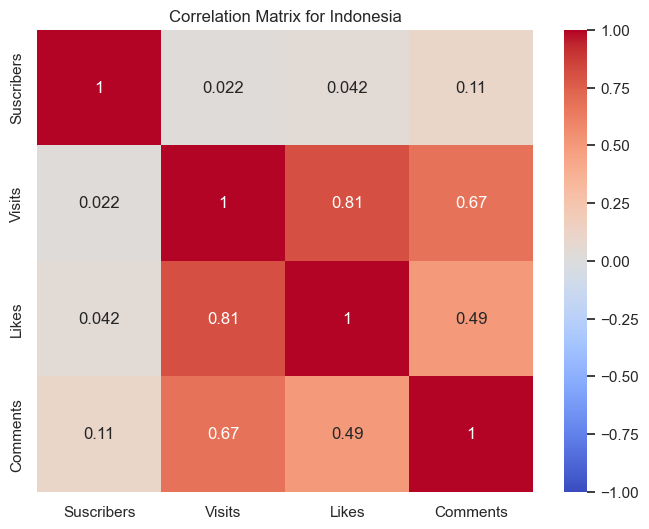

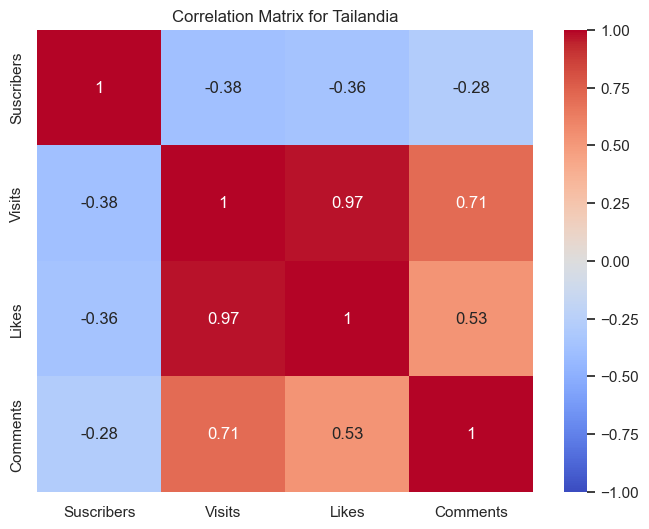

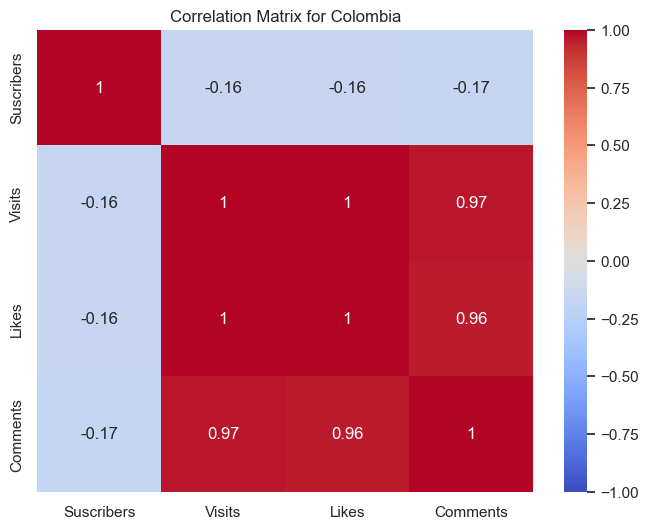

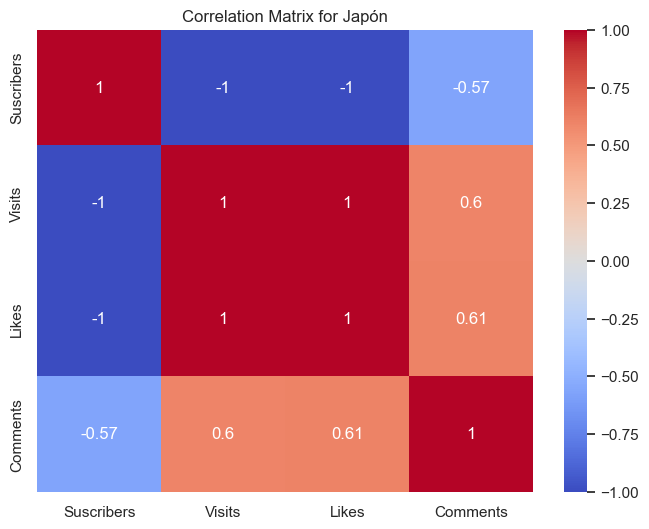

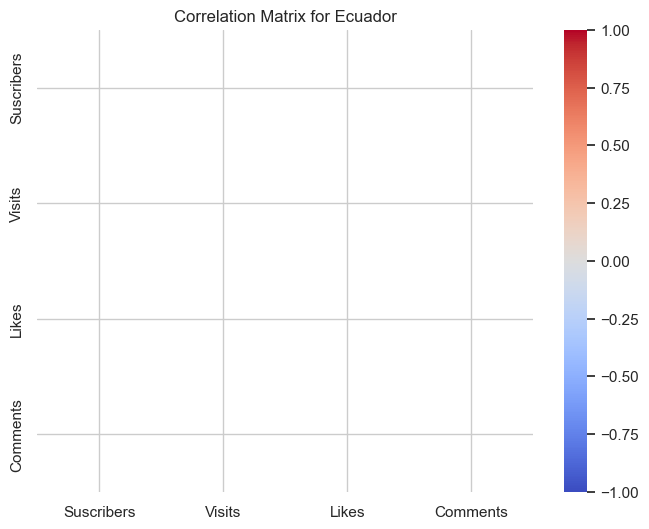

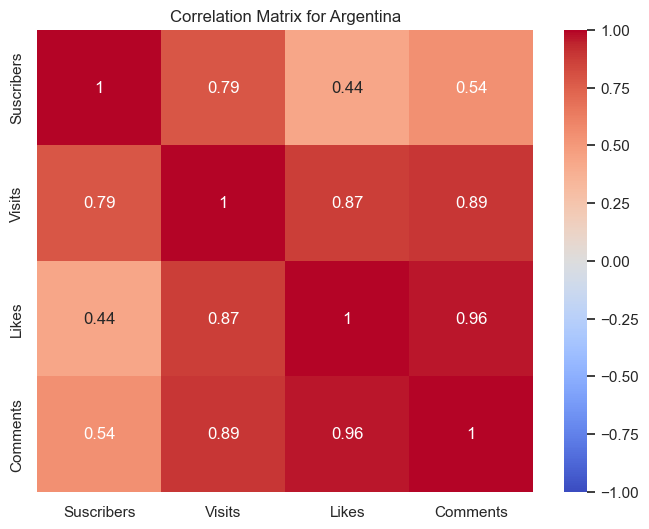

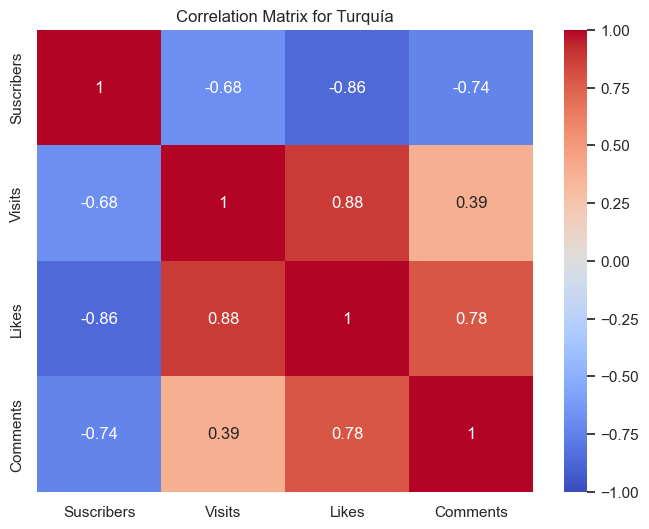

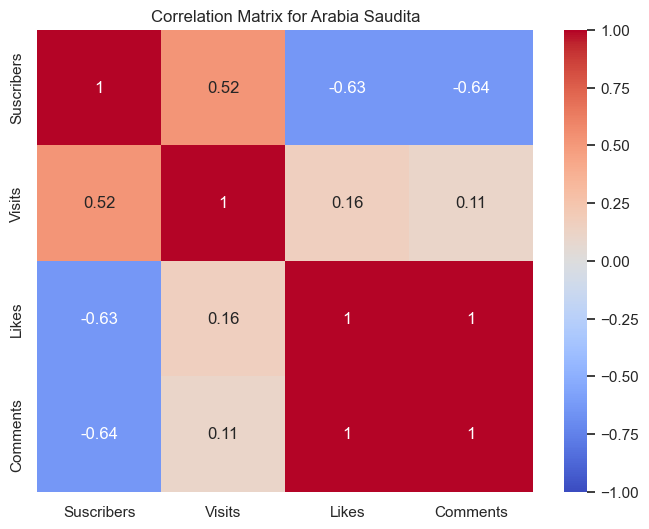

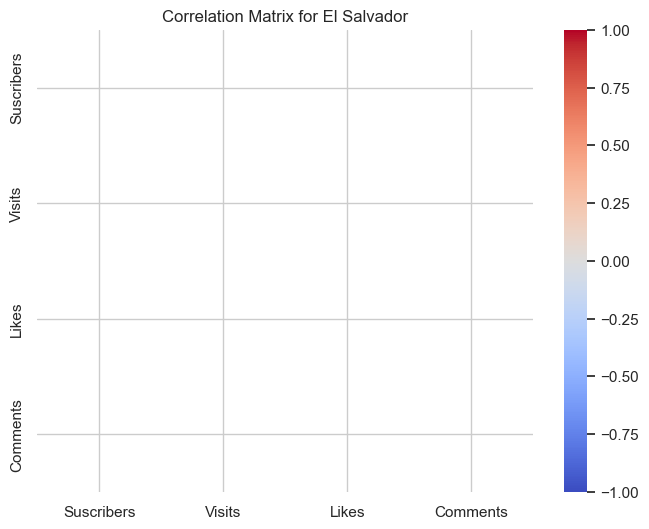

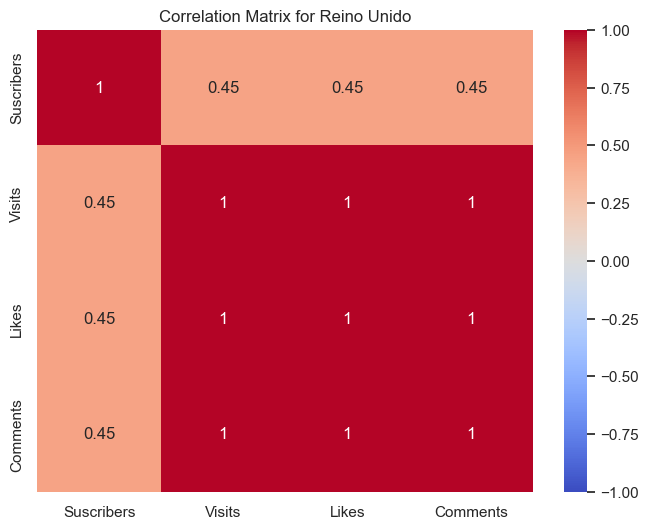

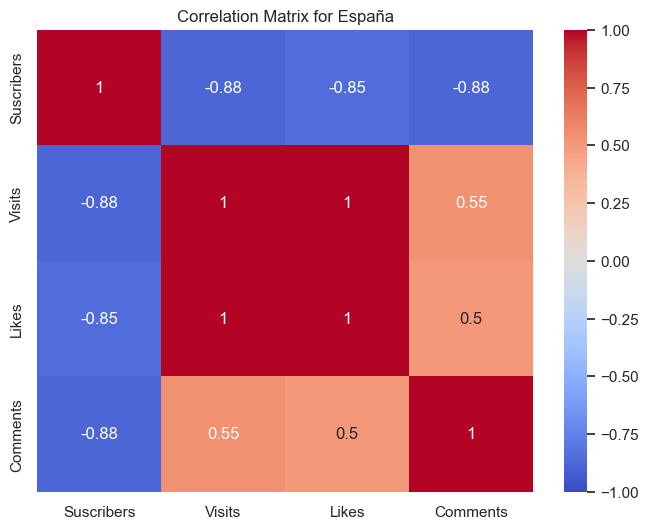

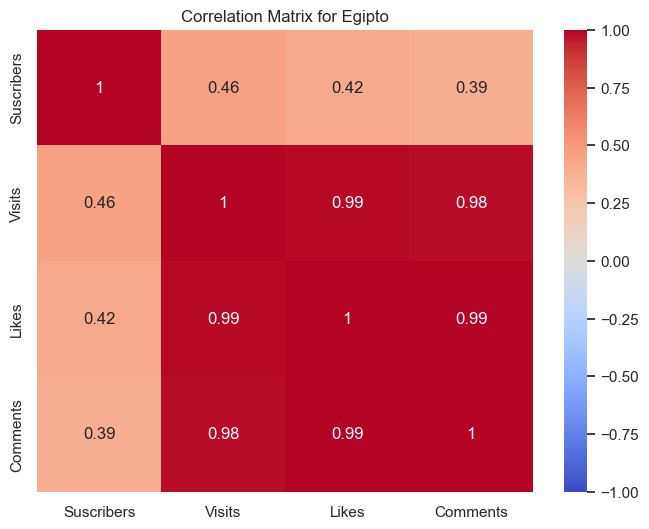

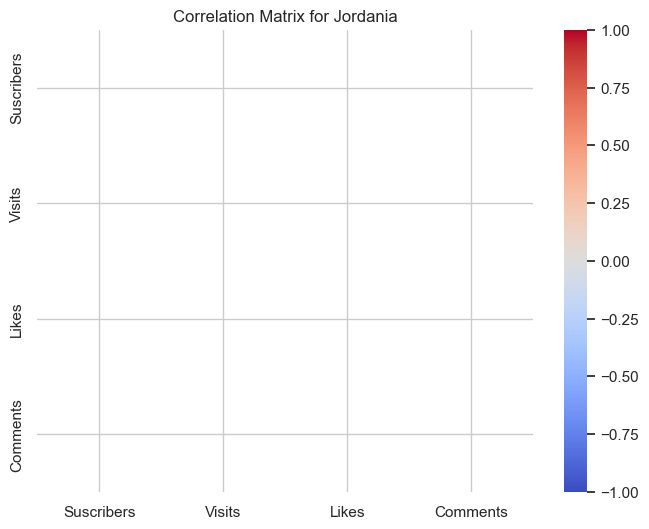

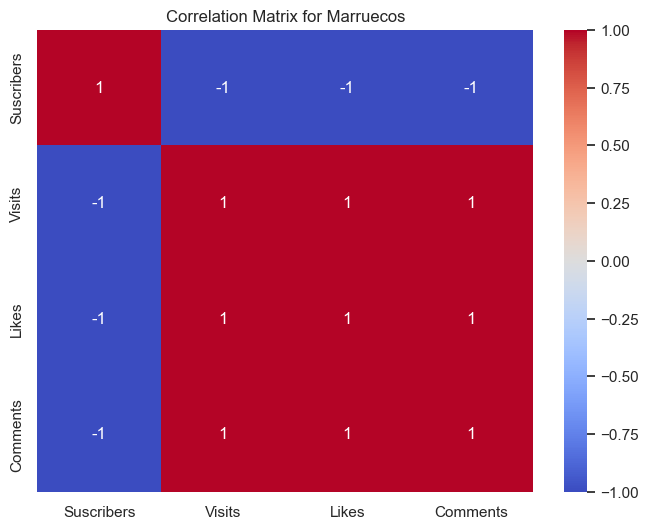

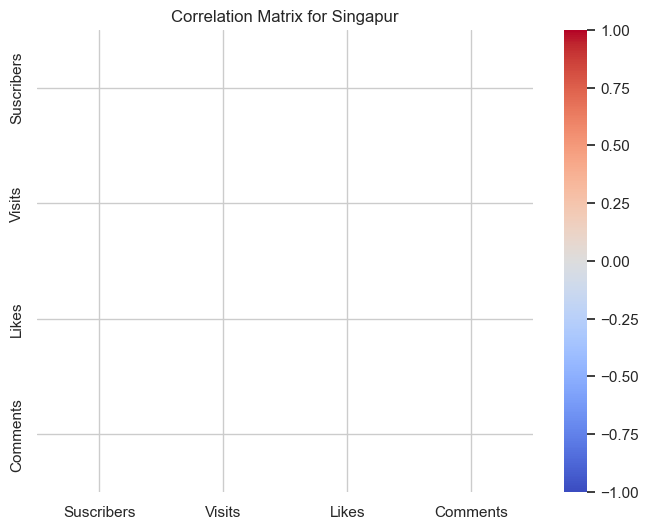

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a DataFrame
df = pd.read_csv('youtubers_df.csv')

# Function to plot correlation heatmap for each country
def plot_country_correlations(df):
    countries = df['Country'].unique()
    for country in countries:
        country_df = df[df['Country'] == country]
        correlation_matrix = country_df[['Suscribers', 'Visits', 'Likes', 'Comments']].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix for {country}')
        plt.show()

plot_country_correlations(df)


In [57]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('youtubers_df.csv')

# Group by country and sum the subscribers
country_subscribers = df.groupby('Country')['Suscribers'].sum()

# Sort the countries by the total number of subscribers in descending order and select the top 10
top_10_countries = country_subscribers.sort_values(ascending=False).head(10)

# Group by category and sum the subscribers
category_subscribers = df.groupby('Categories')['Suscribers'].sum()

# Sort the categories by the total number of subscribers in descending order and select the top 10
top_10_categories = category_subscribers.sort_values(ascending=False).head(10)

# Combine the top 10 countries and categories into a single DataFrame
combined_top_10 = pd.DataFrame({
    'Category': top_10_categories.index,
    'Country': top_10_countries.index,
    'Suscribers': top_10_categories.values
})

# Convert the large numbers to more readable format (e.g., billions)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.2f}B"
    elif x >= 1e6:
        return f"{x/1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Applying the formatting function
combined_top_10['Suscribers'] = combined_top_10['Suscribers'].apply(format_number)

print("Top 10 categories and countries with the most subscribers:")
print(combined_top_10.to_string(index=False))


Top 10 categories and countries with the most subscribers:
                 Category        Country Suscribers
           Música y baile Estados Unidos      4.29B
     Películas, Animación          India      1.38B
      Animación, Juguetes        Unknown    851.90M
Música y baile, Películas         Brasil    798.50M
      Noticias y Política         México    676.10M
   Animación, Videojuegos      Indonesia    659.40M
            Vlogs diarios          Rusia    654.90M
         Películas, Humor      Tailandia    622.10M
                Educación       Colombia    600.30M
         Animación, Humor      Filipinas    561.20M


In [67]:
# Function to list top channels for each country
def top_channels_per_country(df, top_n=5):
    countries = df['Country'].unique()
    for country in countries:
        country_df = df[df['Country'] == country]
        top_channels = country_df.nlargest(top_n, 'Suscribers')
        print(f"Top {top_n} channels in {country}:")
        print(top_channels[['Username', 'Suscribers']])
        print()

top_channels_per_country(df, top_n=5)


Top 5 channels in India:
              Username   Suscribers
0              tseries  249500000.0
3             SETIndia  162600000.0
8      zeemusiccompany   99700000.0
11  GoldminesTelefilms   89700000.0
12             SonySAB   85400000.0

Top 5 channels in Estados Unidos:
      Username   Suscribers
1      MrBeast  183500000.0
5    PewDiePie  111500000.0
9          WWE   97200000.0
10   BLACKPINK   91300000.0
15  HYBELABELS   72700000.0

Top 5 channels in Unknown:
              Username   Suscribers
2            CoComelon  165500000.0
4        KidsDianaShow  113500000.0
6   LikeNastyaofficial  107500000.0
7          VladandNiki  101400000.0
17            Pinkfong   69600000.0

Top 5 channels in Brasil:
         Username  Suscribers
19      KondZilla  66600000.0
48     felipeneto  45600000.0
50  vcsabiavideos  45000000.0
54    whindersson  44400000.0
68     luccastoon  40100000.0

Top 5 channels in México:
           Username  Suscribers
39      JuegaGerman  48600000.0
44   badabunOf

In [75]:
import pandas as pd

# Read the CSV file into df
df = pd.read_csv('youtubers_df.csv')

# Calculate the averages using `agg`
engagement_metrics = df.groupby('Country').agg(
    Avg_Visits_per_Subscriber=('Visits', lambda x: (x.sum() / x.count())),
    Avg_Likes_per_Subscriber=('Likes', lambda x: (x.sum() / x.count())),
    Avg_Comments_per_Subscriber=('Comments', lambda x: (x.sum() / x.count()))
).reset_index()

# Format the results to be more readable
engagement_metrics = engagement_metrics.round({
    'Avg_Visits_per_Subscriber': 2,
    'Avg_Likes_per_Subscriber': 2,
    'Avg_Comments_per_Subscriber': 2
})

print("Engagement metrics per country:")
print(engagement_metrics)


Engagement metrics per country:
           Country  Avg_Visits_per_Subscriber  Avg_Likes_per_Subscriber  \
0   Arabia Saudita                 1143625.00                  29025.00   
1          Argelia                  262050.00                  14400.00   
2        Argentina                 2067742.86                 132979.00   
3       Bangladesh                   33566.67                    349.33   
4           Brasil                  419068.75                  27020.83   
5         Colombia                  910425.00                  55939.31   
6          Ecuador                   34300.00                   4300.00   
7           Egipto                   65220.00                   1502.40   
8      El Salvador                12900000.00                 707600.00   
9           España                  509975.00                  30625.00   
10  Estados Unidos                 2111089.62                  93794.38   
11       Filipinas                  717169.23                  25309

In [ ]:
4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics

In [79]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('youtubers_df.csv')

# Calculate average metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Convert the large numbers to a more readable format (e.g., millions, billions)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.2f}B"
    elif x >= 1e6:
        return f"{x/1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Applying the formatting function to the average metrics
average_metrics_formatted = average_metrics.apply(format_number)

# Print the average metrics in a readable format
print("Average Metrics:")
print(average_metrics_formatted)


Average Metrics:
Suscribers      21.89M
Visits           1.21M
Likes         53632.59
Comments       1288.77
dtype: object


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot boxplot for Subscribers
plt.subplot(2, 2, 1)  # Create a subplot in a 2x2 grid, first position
sns.boxplot(y=df['Suscribers'])  # Plot boxplot for Subscribers
plt.title('Subscribers Boxplot')  # Set the title for the plot

# Plot boxplot for Visits
plt.subplot(2, 2, 2)  # Create a subplot in a 2x2 grid, second position
sns.boxplot(y=df['Visits'])  # Plot boxplot for Visits
plt.title('Visits Boxplot')  # Set the title for the plot

# Plot boxplot for Likes
plt.subplot(2, 2, 3)  # Create a subplot in a 2x2 grid, third position
sns.boxplot(y=df['Likes'])  # Plot boxplot for Likes
plt.title('Likes Boxplot')  # Set the title for the plot

# Plot boxplot for Comments
plt.subplot(2, 2, 4)  # Create a subplot in a 2x2 grid, fourth position
sns.boxplot(y=df['Comments'])  # Plot boxplot for Comments
plt.title('Comments Boxplot')  # Set the title for the plot

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [87]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('youtubers_df.csv')

# Calculate descriptive statistics
descriptive_stats = df[['Suscribers', 'Visits', 'Likes', 'Comments']].describe()

# Convert the large numbers to a more readable format (e.g., millions, billions)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.2f}B"
    elif x >= 1e6:
        return f"{x/1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Apply the formatting function to the descriptive statistics
descriptive_stats_formatted = descriptive_stats.map(format_number)

print("Descriptive Statistics:")
print(descriptive_stats_formatted)


Descriptive Statistics:
      Suscribers     Visits      Likes   Comments
count    1000.00    1000.00    1000.00    1000.00
mean      21.89M      1.21M   53632.59    1288.77
std       16.83M      5.23M  258045.69    6778.19
min       11.70M       0.00       0.00       0.00
25%       13.80M   31975.00     471.75       2.00
50%       16.75M  174450.00    3500.00      67.00
75%       23.70M  865475.00   28650.00     472.00
max      249.50M    117.40M      5.30M  154000.00


Correlation Matrix:
            Suscribers    Visits     Likes  Comments
Suscribers    1.000000  0.245203  0.211639  0.036350
Visits        0.245203  1.000000  0.950470  0.324067
Likes         0.211639  0.950470  1.000000  0.325911
Comments      0.036350  0.324067  0.325911  1.000000


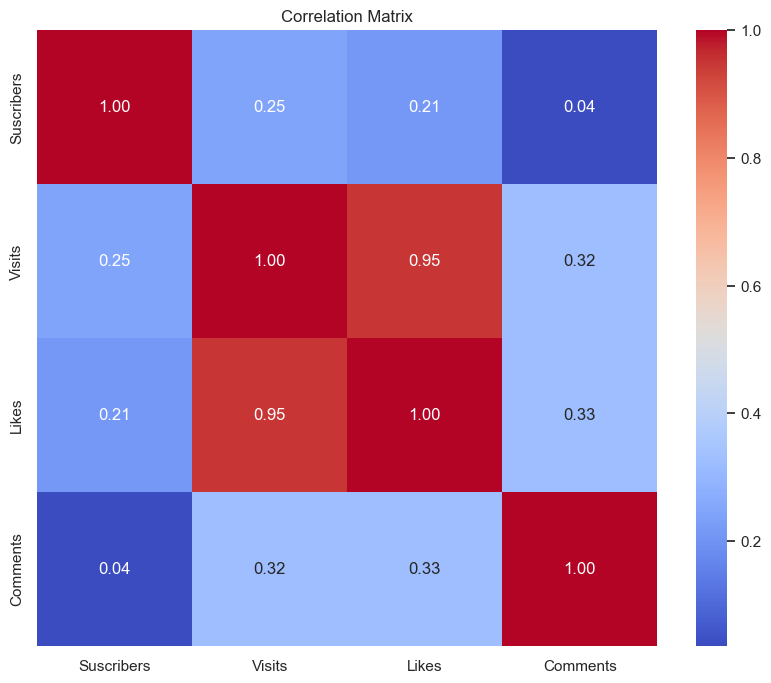

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the specified columns
correlation_matrix = df[['Suscribers', 'Visits', 'Likes', 'Comments']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title for the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


In [99]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(df[['Suscribers', 'Visits', 'Likes', 'Comments']])
df_z_scores = pd.DataFrame(z_scores, columns=['Suscribers', 'Visits', 'Likes', 'Comments'])

# Identify anomalies (e.g., z-score > 3 or < -3)
anomalies = df_z_scores[(df_z_scores > 3) | (df_z_scores < -3)]
print("Anomalies detected:")
print(anomalies.dropna())


Anomalies detected:
Empty DataFrame
Columns: [Suscribers, Visits, Likes, Comments]
Index: []


In [105]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Scatter plot for normal data points
plt.scatter(df['Suscribers'], df['Visits'], alpha=0.5, c='blue', label='Normal')

# Ensure anomalies DataFrame is aligned correctly
anomalies = anomalies.dropna(subset=['Suscribers', 'Visits'])

# Scatter plot for anomalies
plt.scatter(df.loc[anomalies.index, 'Suscribers'],
            df.loc[anomalies.index, 'Visits'],
            c='red', label='Anomalies')

# Set labels and title
plt.xlabel('Subscribers')
plt.ylabel('Visits')
plt.title('Subscribers vs Visits with Anomalies')
plt.legend()

# Display the plot
plt.show()


In [ ]:
Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

In [111]:
import pandas as pd

# Load the dataset
df = pd.read_csv('youtubers_df.csv')

# Count the number of streamers in each category
category_counts = df['Categories'].value_counts()
print("Number of Streamers per Category:")
print(category_counts)


Number of Streamers per Category:
Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor          

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style using Seaborn
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plot the distribution of content categories using a bar plot
# Assign the x variable to hue and set legend=False to avoid the warning
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', dodge=False, legend=False)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the label for the x-axis
plt.xlabel('Content Categories')

# Set the label for the y-axis
plt.ylabel('Number of Streamers')

# Set the title for the plot
plt.title('Distribution of Content Categories')

# Display the plot
plt.show()


In [119]:
import pandas as pd

# Group by content category and calculate mean performance metrics
category_performance = df.groupby('Categories').agg(
    Avg_Suscribers=('Suscribers', 'mean'),
    Avg_Visits=('Visits', 'mean'),
    Avg_Likes=('Likes', 'mean'),
    Avg_Comments=('Comments', 'mean')
).reset_index()

# Convert the large numbers to a more readable format (e.g., millions, billions)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.2f}B"
    elif x >= 1e6:
        return f"{x/1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Applying the formatting function to each column
category_performance['Avg_Suscribers'] = category_performance['Avg_Suscribers'].apply(format_number)
category_performance['Avg_Visits'] = category_performance['Avg_Visits'].apply(format_number)
category_performance['Avg_Likes'] = category_performance['Avg_Likes'].apply(format_number)
category_performance['Avg_Comments'] = category_performance['Avg_Comments'].apply(format_number)

# Display performance metrics by category
print("Performance Metrics by Content Category:")
print(category_performance)


Performance Metrics by Content Category:
                            Categories Avg_Suscribers Avg_Visits  Avg_Likes  \
0                                 ASMR         15.20M  368500.00    4100.00   
1                ASMR, Comida y bebida         13.00M  557500.00    8600.00   
2                            Animación         17.64M  636718.18   21413.45   
3                     Animación, Humor         20.79M      3.76M  145768.33   
4           Animación, Humor, Juguetes         13.90M    8000.00      37.00   
5                  Animación, Juguetes         29.38M  525448.28    2653.07   
6               Animación, Videojuegos         19.39M      1.20M   79294.03   
7                  Animales y mascotas         15.60M      2.23M  102750.00   
8                        Belleza, Moda         23.90M  964500.00   62300.00   
9                 Ciencia y tecnología         17.26M  887128.57   59283.14   
10                  Coches y vehículos         13.20M  266400.00   18150.00   
11         

In [127]:
# Identify top-performing categories based on different metrics
top_categories_subscribers = category_performance.sort_values(by='Avg_Suscribers', ascending=False)
top_categories_visits = category_performance.sort_values(by='Avg_Visits', ascending=False)
top_categories_likes = category_performance.sort_values(by='Avg_Likes', ascending=False)
top_categories_comments = category_performance.sort_values(by='Avg_Comments', ascending=False)

print("Top Categories by Average Subscribers:")
print(top_categories_subscribers.head())

print("\nTop Categories by Average Visits:")
print(top_categories_visits.head())

print("\nTop Categories by Average Likes:")
print(top_categories_likes.head())

print("\nTop Categories by Average Comments:")
print(top_categories_comments.head())


Top Categories by Average Subscribers:
                Categories Avg_Suscribers Avg_Visits  Avg_Likes Avg_Comments
25                Juguetes         37.88M  700510.00    5290.20         2.80
39  Películas, Videojuegos         33.25M  694037.50   48083.38      1569.50
5      Animación, Juguetes         29.38M  525448.28    2653.07         0.52
42      Videojuegos, Humor         28.76M     10.24M  420511.76      4827.06
29          Música y baile         26.84M  374388.12   17405.68      1998.93

Top Categories by Average Visits:
              Categories Avg_Suscribers Avg_Visits Avg_Likes Avg_Comments
8          Belleza, Moda         23.90M  964500.00  62300.00      1100.00
37      Películas, Humor         18.30M  938723.53  40684.62      1008.79
40  Viajes, Espectáculos         20.40M   89500.00    782.00        49.00
9   Ciencia y tecnología         17.26M  887128.57  59283.14      1363.57
22               Fitness         16.35M   86200.00   3750.00        63.50

Top Categories by A

In [132]:
import pandas as pd

# Calculate overall averages for each metric
overall_averages = {
    'Avg_Suscribers': df['Suscribers'].mean(),
    'Avg_Visits': df['Visits'].mean(),
    'Avg_Likes': df['Likes'].mean(),
    'Avg_Comments': df['Comments'].mean()
}

# Convert columns to numeric, coerce errors to NaN
for metric in overall_averages.keys():
    category_performance[metric] = pd.to_numeric(category_performance[metric], errors='coerce')

# Handle NaN values if needed (e.g., fill with 0)
category_performance.fillna(0, inplace=True)

# Add benchmark columns to the performance DataFrame
for metric, avg in overall_averages.items():
    benchmark_column_name = f'{metric}_vs_Benchmark'
    category_performance[benchmark_column_name] = category_performance[metric] - avg

# Convert the large numbers to a more readable format (e.g., millions, billions)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.2f}B"
    elif x >= 1e6:
        return f"{x/1e6:.2f}M"
    else:
        return f"{x:.2f}"

# Applying the formatting function to each column
for column in ['Avg_Suscribers', 'Avg_Visits', 'Avg_Likes', 'Avg_Comments']:
    category_performance[column] = category_performance[column].apply(format_number)

print("Performance Metrics vs Benchmark:")
print(category_performance)


Performance Metrics vs Benchmark:
                            Categories Avg_Suscribers Avg_Visits  Avg_Likes  \
0                                 ASMR           0.00  368500.00    4100.00   
1                ASMR, Comida y bebida           0.00  557500.00    8600.00   
2                            Animación           0.00  636718.18   21413.45   
3                     Animación, Humor           0.00       0.00  145768.33   
4           Animación, Humor, Juguetes           0.00    8000.00      37.00   
5                  Animación, Juguetes           0.00  525448.28    2653.07   
6               Animación, Videojuegos           0.00       0.00   79294.03   
7                  Animales y mascotas           0.00       0.00  102750.00   
8                        Belleza, Moda           0.00  964500.00   62300.00   
9                 Ciencia y tecnología           0.00  887128.57   59283.14   
10                  Coches y vehículos           0.00  266400.00   18150.00   
11                

In [ ]:
6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

In [138]:
# Analyze the distribution of performance tiers
print("Distribution of Subscriber Performance Tiers:")
print(df['Suscriber_Performance'].value_counts())

print("\nDistribution of Visits Performance Tiers:")
print(df['Visits_Performance'].value_counts())

print("\nDistribution of Likes Performance Tiers:")
print(df['Likes_Performance'].value_counts())

print("\nDistribution of Comments Performance Tiers:")
print(df['Comments_Performance'].value_counts())

# Visualize the distribution of performance tiers
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot distribution for each performance tier
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Suscriber_Performance', data=df, palette='Blues', hue='Suscriber_Performance', legend=False)
plt.title('Distribution of Subscriber Performance Tiers')

plt.subplot(2, 2, 2)
sns.countplot(x='Visits_Performance', data=df, palette='Greens', hue='Visits_Performance', legend=False)
plt.title('Distribution of Visits Performance Tiers')

plt.subplot(2, 2, 3)
sns.countplot(x='Likes_Performance', data=df, palette='Oranges', hue='Likes_Performance', legend=False)
plt.title('Distribution of Likes Performance Tiers')

plt.subplot(2, 2, 4)
sns.countplot(x='Comments_Performance', data=df, palette='Reds', hue='Comments_Performance', legend=False)
plt.title('Distribution of Comments Performance Tiers')

plt.tight_layout()
plt.show()


Distribution of Subscriber Performance Tiers:
Suscriber_Performance
Low          263
High         253
Very High    247
Medium       237
Name: count, dtype: int64

Distribution of Visits Performance Tiers:
Visits_Performance
Medium       250
Very High    250
Low          250
High         250
Name: count, dtype: int64

Distribution of Likes Performance Tiers:
Likes_Performance
Medium       251
Very High    250
Low          250
High         249
Name: count, dtype: int64

Distribution of Comments Performance Tiers:
Comments_Performance
Low          254
High         250
Very High    249
Medium       247
Name: count, dtype: int64


In [142]:
# Sort the DataFrame by 'Suscribers' in descending order and get the top 10
top_10_subscribers = df.sort_values(by='Suscribers', ascending=False).head(10)

# Select relevant columns for display
top_10_subscribers_display = top_10_subscribers[['Username', 'Country', 'Suscribers']]

print("Top 10 Streamers with Most Subscribers:")
print(top_10_subscribers_display)


Top 10 Streamers with Most Subscribers:
             Username         Country   Suscribers
0             tseries           India  249500000.0
1             MrBeast  Estados Unidos  183500000.0
2           CoComelon         Unknown  165500000.0
3            SETIndia           India  162600000.0
4       KidsDianaShow         Unknown  113500000.0
5           PewDiePie  Estados Unidos  111500000.0
6  LikeNastyaofficial         Unknown  107500000.0
7         VladandNiki         Unknown  101400000.0
8     zeemusiccompany           India   99700000.0
9                 WWE  Estados Unidos   97200000.0


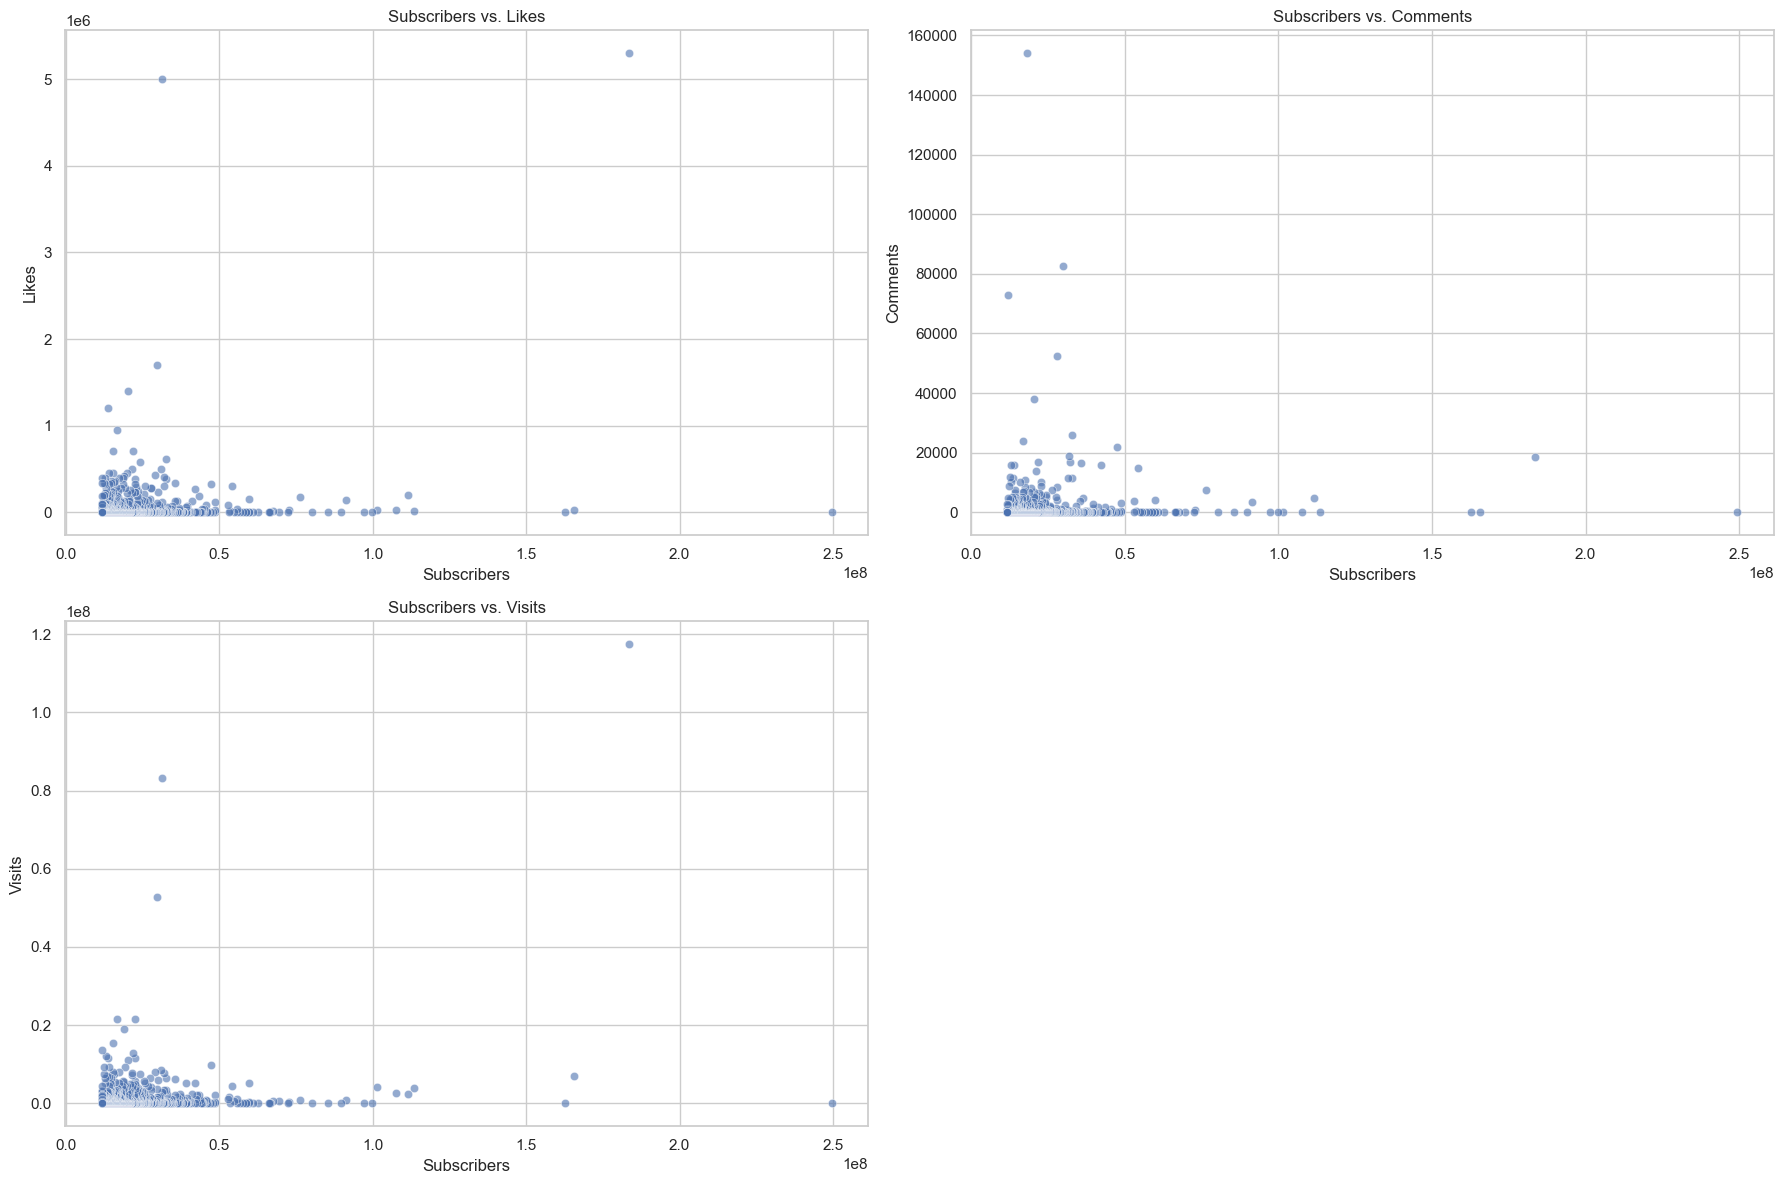

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(18, 12))

# Plot Subscribers vs. Likes
plt.subplot(2, 2, 1)  # Create a subplot in a 2x2 grid, first position
sns.scatterplot(x='Suscribers', y='Likes', data=df, alpha=0.6)  # Plot scatterplot for Subscribers vs. Likes
plt.xlabel('Subscribers')  # Set the label for the x-axis
plt.ylabel('Likes')  # Set the label for the y-axis
plt.title('Subscribers vs. Likes')  # Set the title for the plot

# Plot Subscribers vs. Comments
plt.subplot(2, 2, 2)  # Create a subplot in a 2x2 grid, second position
sns.scatterplot(x='Suscribers', y='Comments', data=df, alpha=0.6)  # Plot scatterplot for Subscribers vs. Comments
plt.xlabel('Subscribers')  # Set the label for the x-axis
plt.ylabel('Comments')  # Set the label for the y-axis
plt.title('Subscribers vs. Comments')  # Set the title for the plot

# Plot Subscribers vs. Visits
plt.subplot(2, 2, 3)  # Create a subplot in a 2x2 grid, third position
sns.scatterplot(x='Suscribers', y='Visits', data=df, alpha=0.6)  # Plot scatterplot for Subscribers vs. Visits
plt.xlabel('Subscribers')  # Set the label for the x-axis
plt.ylabel('Visits')  # Set the label for the y-axis
plt.title('Subscribers vs. Visits')  # Set the title for the plot

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
7.Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [152]:
# Filter streamers with above-average performance in all metrics
above_average_streamers = df[
    (df['Suscribers'] > average_metrics['Suscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

# Display the top-performing content creators
print("Top-Performing Content Creators (Above Average in All Metrics):")
print(above_average_streamers[['Username', 'Country', 'Suscribers', 'Visits', 'Likes', 'Comments']])


Top-Performing Content Creators (Above Average in All Metrics):
                  Username         Country   Suscribers       Visits  \
1                  MrBeast  Estados Unidos  183500000.0  117400000.0   
5                PewDiePie  Estados Unidos  111500000.0    2400000.0   
26             dudeperfect  Estados Unidos   59700000.0    5300000.0   
34             TaylorSwift  Estados Unidos   54100000.0    4300000.0   
39             JuegaGerman          México   48600000.0    2000000.0   
43                A4a4a4a4           Rusia   47300000.0    9700000.0   
58               Mikecrack          México   43400000.0    2200000.0   
62          KimberlyLoaiza          México   42100000.0    5300000.0   
64         luisitocomunica          México   41100000.0    2500000.0   
70             JessNoLimit       Indonesia   39600000.0    1300000.0   
96          TotalGaming093           India   36300000.0    1500000.0   
98    TechnoGamerzOfficial           India   35600000.0    6200000.0   


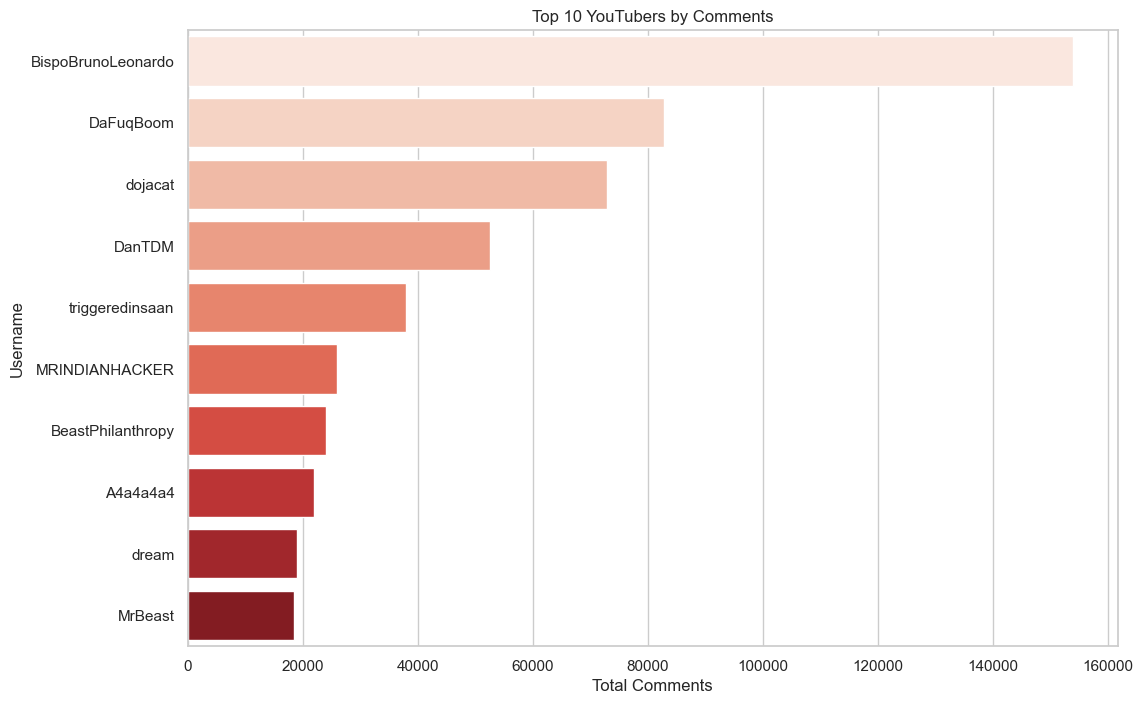

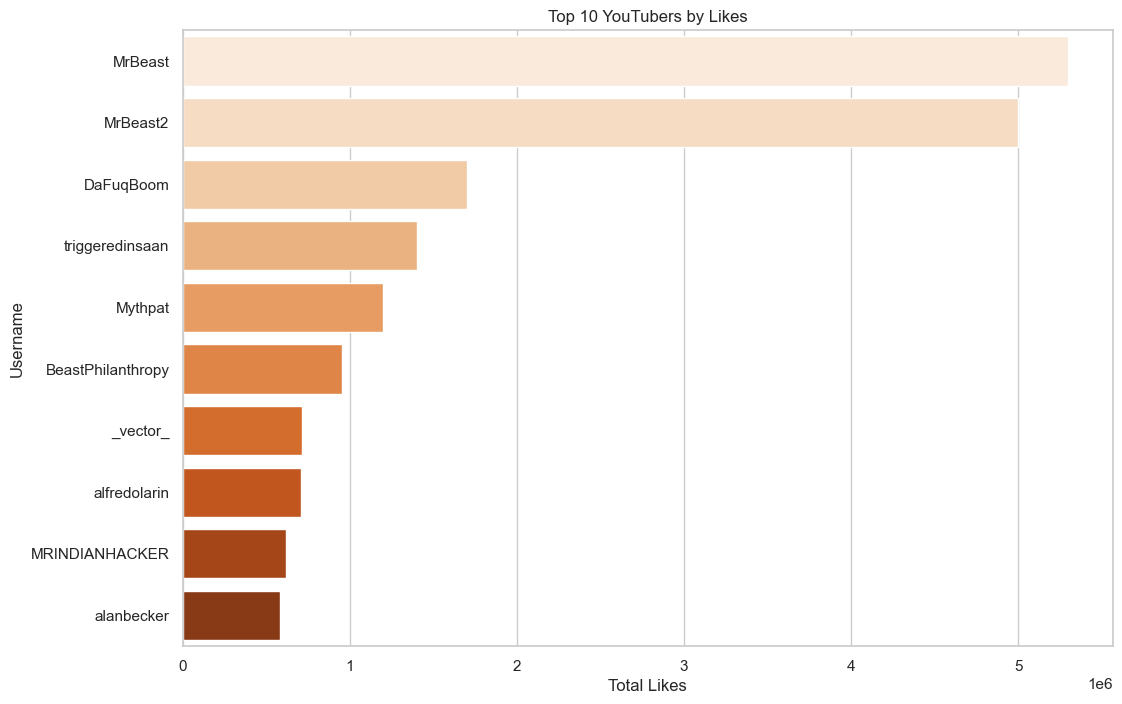

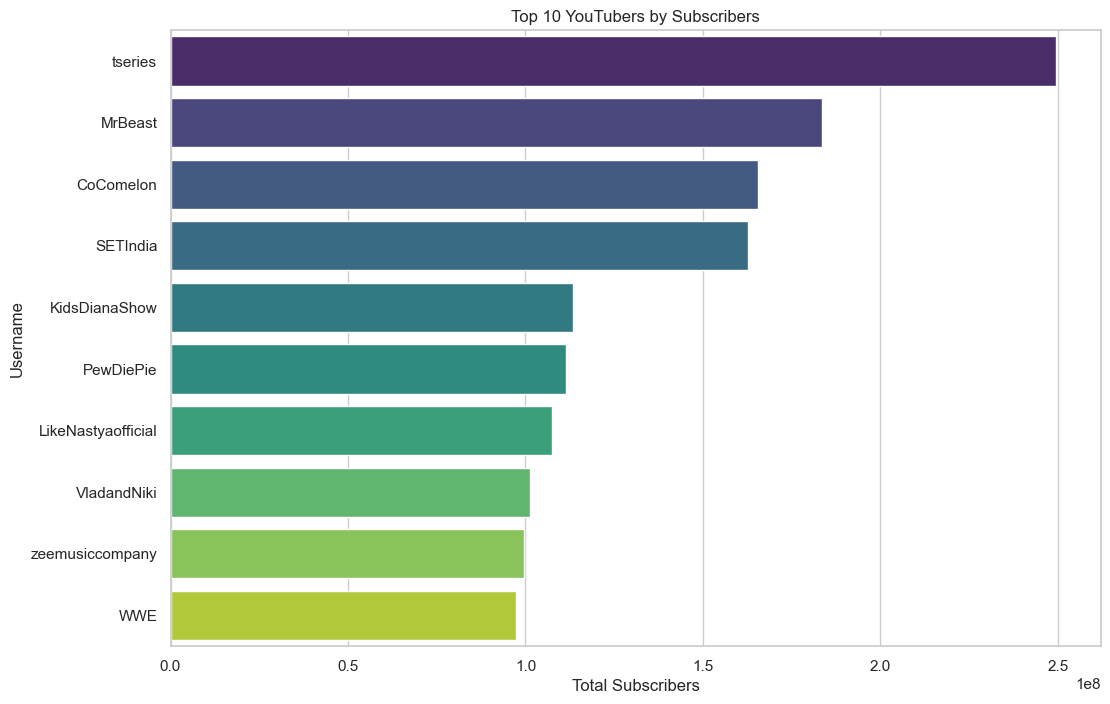

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a DataFrame
df = pd.read_csv('youtubers_df.csv')

# Example dataframes for top 10 categories
top_10_comments = df.sort_values(by='Comments', ascending=False).head(10)
top_10_likes = df.sort_values(by='Likes', ascending=False).head(10)
top_10_visits = df.sort_values(by='Visits', ascending=False).head(10)
top_10_subscribers = df.sort_values(by='Suscribers', ascending=False).head(10)

# Plot the top 10 YouTubers by comments
plt.figure(figsize=(12, 8))
sns.barplot(x='Comments', y='Username', data=top_10_comments, palette='Reds', hue='Username', dodge=False, legend=False)
plt.title('Top 10 YouTubers by Comments')
plt.xlabel('Total Comments')
plt.ylabel('Username')
plt.show()

# Plot the top 10 YouTubers by likes
plt.figure(figsize=(12, 8))
sns.barplot(x='Likes', y='Username', data=top_10_likes, palette='Oranges', hue='Username', dodge=False, legend=False)
plt.title('Top 10 YouTubers by Likes')
plt.xlabel('Total Likes')
plt.ylabel('Username')
plt.show()

# Plot the top 10 YouTubers by visits
plt.figure(figsize=(12, 8))
sns.barplot(x='Visits', y='Username', data=top_10_visits, palette='Blues', hue='Username', dodge=False, legend=False)
plt.title('Top 10 YouTubers by Visits')
plt.xlabel('Total Visits')
plt.ylabel('Username')
plt.show()

# Plot the top 10 YouTubers by subscribers
plt.figure(figsize=(12, 8))
sns.barplot(x='Suscribers', y='Username', data=top_10_subscribers, palette='viridis', hue='Username', dodge=False, legend=False)
plt.title('Top 10 YouTubers by Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Username')
plt.show()


In [170]:
# Rank top performers by each metric
top_by_subscribers = above_average_streamers.sort_values(by='Suscribers', ascending=False)
top_by_visits = above_average_streamers.sort_values(by='Visits', ascending=False)
top_by_likes = above_average_streamers.sort_values(by='Likes', ascending=False)
top_by_comments = above_average_streamers.sort_values(by='Comments', ascending=False)  # Fixed the syntax error here

# Display top performers for each metric
print("Top Performers by Subscribers:")
print(top_by_subscribers[['Username', 'Suscribers']].head(10))

print("\nTop Performers by Visits:")
print(top_by_visits[['Username', 'Visits']].head(10))

print("\nTop Performers by Likes:")
print(top_by_likes[['Username', 'Likes']].head(10))

print("\nTop Performers by Comments:")
print(top_by_comments[['Username', 'Comments']].head(10))


Top Performers by Subscribers:
           Username   Suscribers
1           MrBeast  183500000.0
5         PewDiePie  111500000.0
26      dudeperfect   59700000.0
34      TaylorSwift   54100000.0
39      JuegaGerman   48600000.0
43         A4a4a4a4   47300000.0
58        Mikecrack   43400000.0
62   KimberlyLoaiza   42100000.0
64  luisitocomunica   41100000.0
70      JessNoLimit   39600000.0

Top Performers by Visits:
                  Username       Visits
1                  MrBeast  117400000.0
136               MrBeast2   83100000.0
153              DaFuqBoom   52700000.0
288  VillageCookingChannel   21500000.0
300           alfredolarin   12900000.0
278            StokesTwins   11700000.0
43                A4a4a4a4    9700000.0
131           fedevigevani    7700000.0
238             alanbecker    7600000.0
123         MRINDIANHACKER    6500000.0

Top Performers by Likes:
                 Username      Likes
1                 MrBeast  5300000.0
136              MrBeast2  5000000.0
15

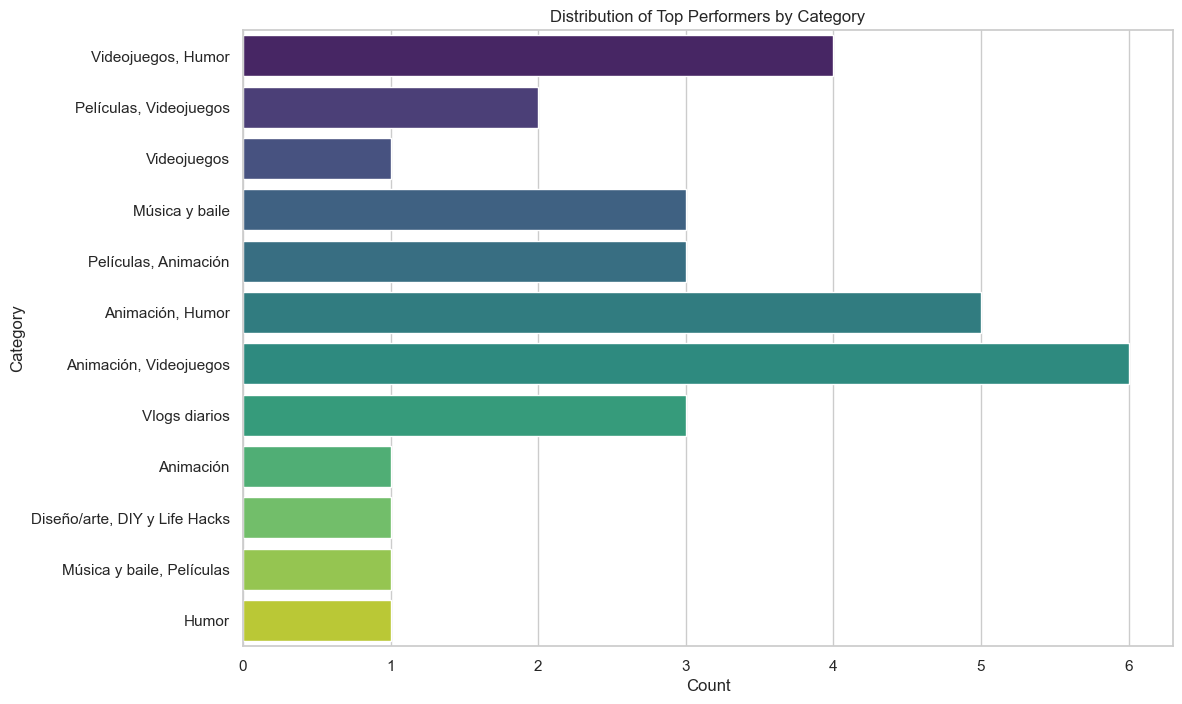

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of top performers by country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=above_average_streamers, palette='viridis', hue='Country', dodge=False, legend=False)
plt.title('Distribution of Top Performers by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Distribution of top performers by category
plt.figure(figsize=(12, 8))
sns.countplot(y='Categories', data=above_average_streamers, palette='viridis', hue='Categories', dodge=False, legend=False)
plt.title('Distribution of Top Performers by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


In [164]:
# Correlation matrix for top performers
correlation_matrix = above_average_streamers[['Suscribers', 'Visits', 'Likes', 'Comments']].corr()
print("Correlation Matrix for Top Performers:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Top Performers')
plt.show()


Correlation Matrix for Top Performers:
            Suscribers    Visits     Likes  Comments
Suscribers    1.000000  0.599269  0.560026  0.050573
Visits        0.599269  1.000000  0.970297  0.337177
Likes         0.560026  0.970297  1.000000  0.255489
Comments      0.050573  0.337177  0.255489  1.000000


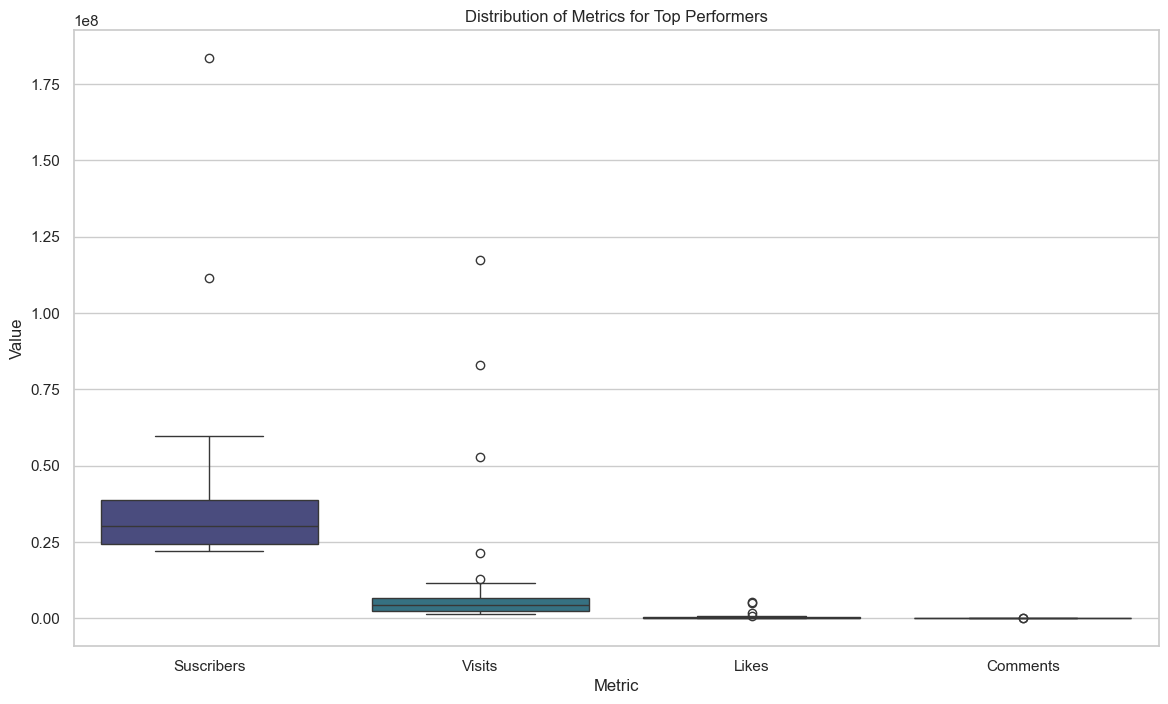

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
melted_df = pd.melt(above_average_streamers, id_vars=['Username'], value_vars=['Suscribers', 'Visits', 'Likes', 'Comments'],
                     var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Metric', y='Value', data=melted_df, palette='viridis', hue='Metric', dodge=False, legend=False)
plt.title('Distribution of Metrics for Top Performers')
plt.show()


In [ ]:
8.Content Recommendations:
Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('youtubers_df.csv')

# Compute the 'Overall_Boost' for the entire DataFrame
df['Overall_Boost'] = (
    df['Suscribers'] + 
    df['Visits'] + 
    df['Likes'] + 
    df['Comments']
)

# Check available categories
categories = df['Categories'].unique()
print("Available Categories:", categories)

# Select a category from the available ones (e.g., 'Música y baile')
user_preference = 'Música y baile'  # Replace 'Música y baile' with any available category from the list

# Filter and sort streamers based on user preference
top_boosted_streamers = df[df['Categories'] == user_preference].sort_values(by='Overall_Boost', ascending=False).head(10)

# Plot the top performers with the highest boosts
plt.figure(figsize=(12, 8))
sns.barplot(x='Overall_Boost', y='Username', data=top_boosted_streamers, color='steelblue')  # Use color instead of palette
plt.xlabel('Overall Performance Boost')
plt.ylabel('Username')
plt.title('Top 10 Streamers with Highest Performance Boost in Category: {}'.format(user_preference))
plt.show()


Available Categories: ['Música y baile' 'Videojuegos, Humor' 'Educación' nan
 'Animación, Juguetes' 'Películas, Videojuegos' 'Juguetes' 'Videojuegos'
 'Películas, Animación' 'Películas' 'Noticias y Política'
 'Animación, Humor' 'Música y baile, Animación'
 'Música y baile, Películas' 'Películas, Juguetes' 'Películas, Humor'
 'Vlogs diarios' 'Videojuegos, Juguetes' 'Animación, Videojuegos'
 'Animación' 'Música y baile, Humor' 'Diseño/arte, DIY y Life Hacks'
 'Ciencia y tecnología' 'Fitness, Salud y autoayuda' 'Belleza, Moda'
 'Humor' 'Comida y bebida' 'Deportes' 'Fitness' 'Viajes, Espectáculos'
 'Comida y bebida, Salud y autoayuda' 'Diseño/arte'
 'DIY y Life Hacks, Juguetes' 'Educación, Juguetes'
 'Juguetes, Coches y vehículos' 'Música y baile, Juguetes'
 'Animales y mascotas' 'ASMR' 'Moda' 'DIY y Life Hacks'
 'Diseño/arte, Belleza' 'Coches y vehículos' 'Animación, Humor, Juguetes'
 'ASMR, Comida y bebida' 'Comida y bebida, Juguetes'
 'Juguetes, DIY y Life Hacks']
